In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


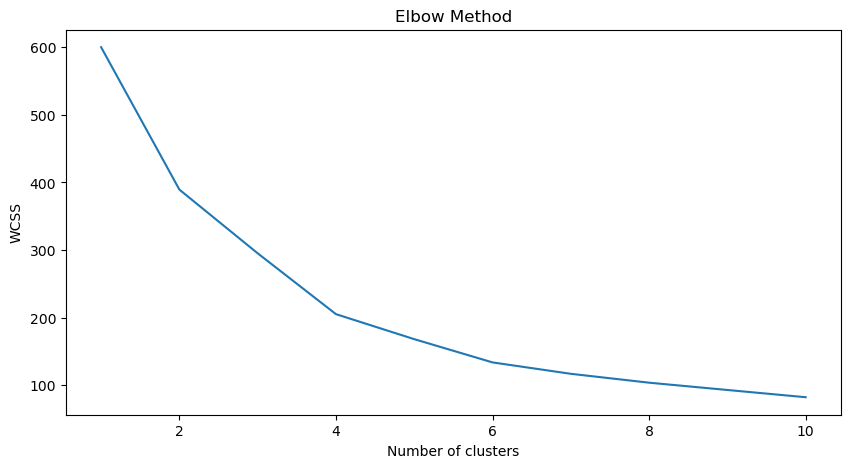

In [6]:
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [7]:

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)


df['Cluster'] = clusters


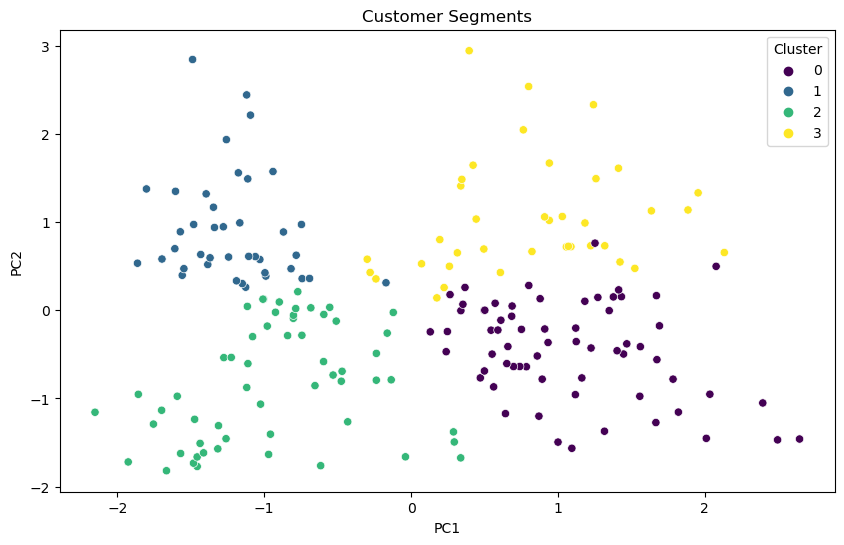

In [8]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Customer Segments')
plt.show()


<Figure size 1200x800 with 0 Axes>

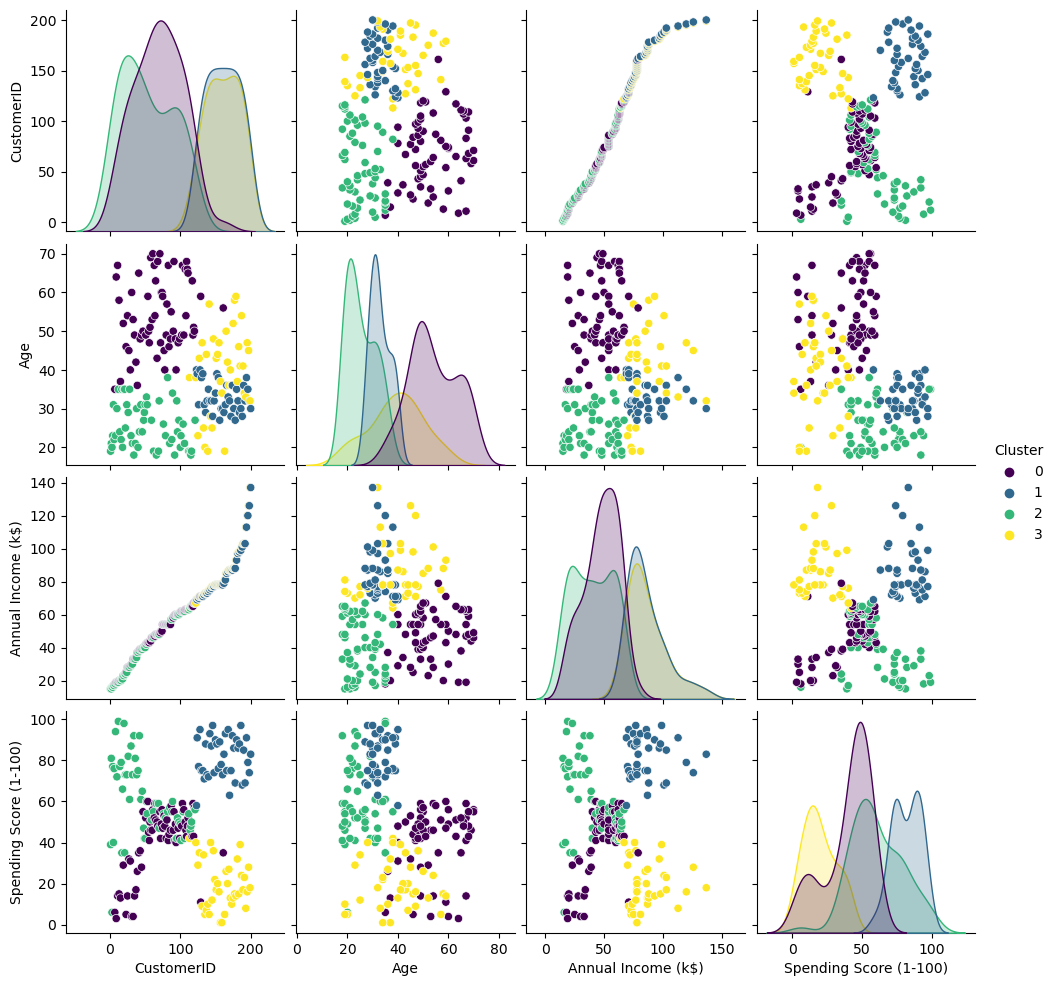

In [9]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()


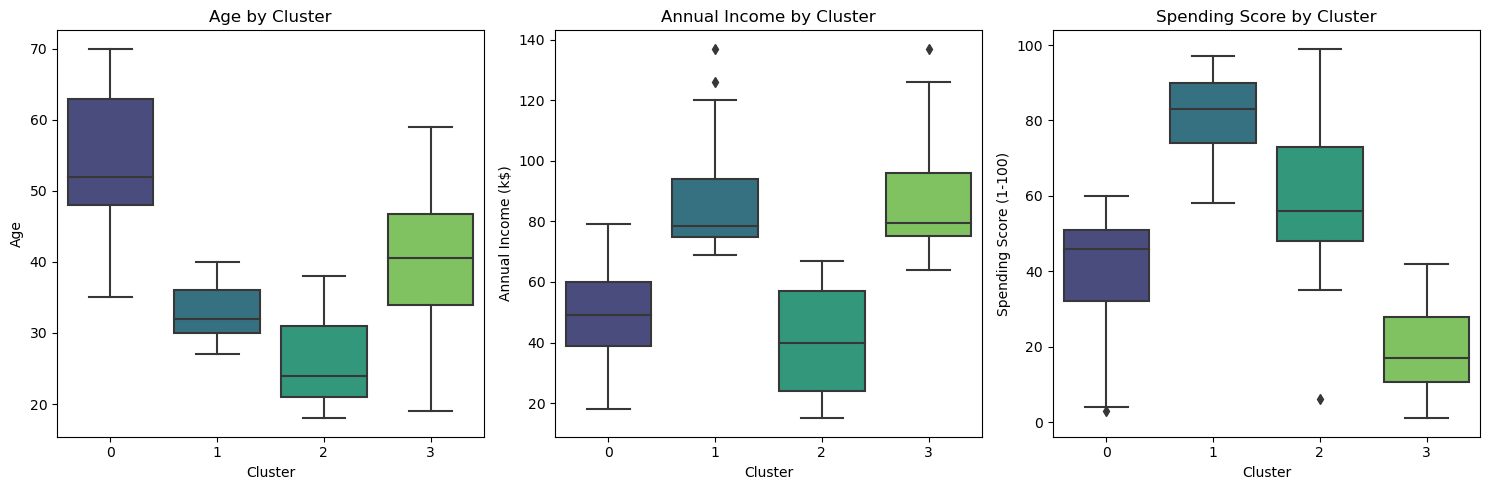

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Age', data=df, palette='viridis')
plt.title('Age by Cluster')

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df, palette='viridis')
plt.title('Annual Income by Cluster')

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df, palette='viridis')
plt.title('Spending Score by Cluster')

plt.tight_layout()
plt.show()


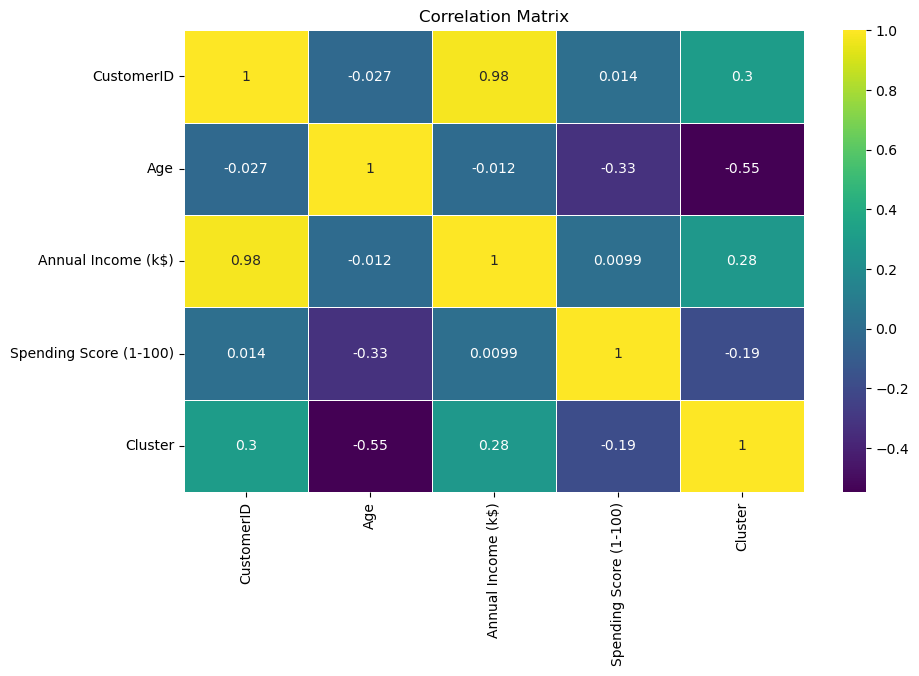

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(data=cluster_centers, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print(cluster_df)

         Age  Annual Income (k$)  Spending Score (1-100)
0  53.984615           47.707692               39.969231
1  32.875000           86.100000               81.525000
2  25.438596           40.000000               60.298246
3  39.368421           86.500000               19.578947


In [13]:
cluster_summary = df.groupby('Cluster').mean().reset_index()
print(cluster_summary)

   Cluster  CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
0        0   69.415385  53.984615           47.707692               39.969231
1        1  161.025000  32.875000           86.100000               81.525000
2        2   53.438596  25.438596           40.000000               60.298246
3        3  160.552632  39.368421           86.500000               19.578947
